# Heart Disease

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratoy Data Analysis

In [4]:
df = pd.read_csv("heart_cleveland_upload.csv")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
df.head()

Total Rows: 297
Total Columns: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df[df.isna()].count()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
for column in list(df.columns):
    uniqueValues = df[column].nunique()

    print(f"Unique values for {column}")
    print(uniqueValues)

Unique values for age
41
Unique values for sex
2
Unique values for cp
4
Unique values for trestbps
50
Unique values for chol
152
Unique values for fbs
2
Unique values for restecg
3
Unique values for thalach
91
Unique values for exang
2
Unique values for oldpeak
40
Unique values for slope
3
Unique values for ca
4
Unique values for thal
3
Unique values for condition
2


In [10]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

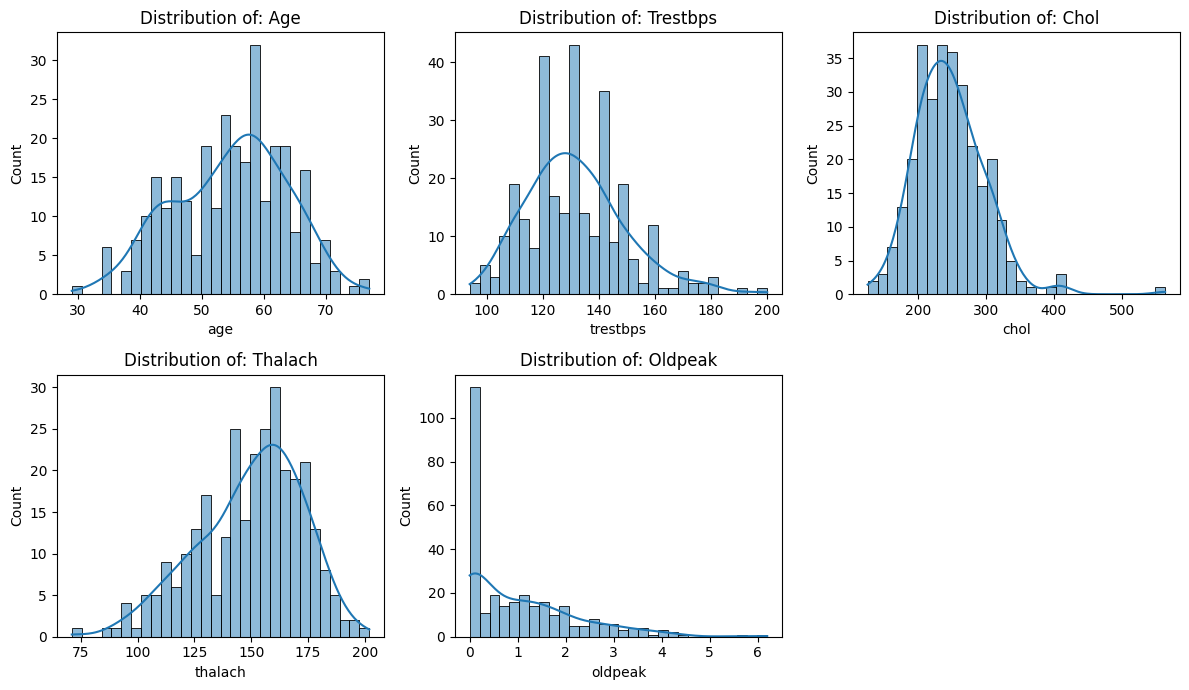

In [11]:
# Numerical features distribution
plt.figure(figsize=(12, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of: {column.capitalize()}")
plt.tight_layout()
plt.show()

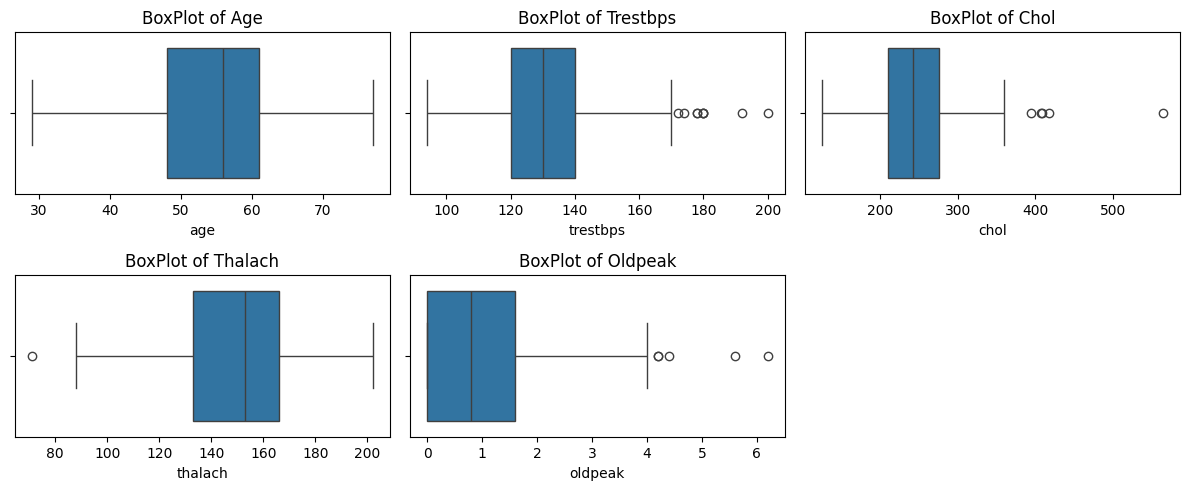

In [12]:
plt.figure(figsize=(12, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(f"BoxPlot of {column.capitalize()}")
plt.tight_layout()
plt.show()

In [13]:
df[df["trestbps"] > 170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0
45,54,1,1,192,283,0,2,195,0,0.0,0,1,2,1
76,68,1,2,180,274,1,2,150,1,1.6,1,0,2,1
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2,0
167,66,0,3,178,228,1,0,165,1,1.0,1,2,2,1
178,64,0,3,180,325,0,0,154,1,0.0,0,0,0,0
209,59,0,3,174,249,0,0,143,1,0.0,1,0,0,1
234,56,0,3,200,288,1,2,133,1,4.0,2,2,2,1
242,55,0,3,180,327,0,1,117,1,3.4,1,0,0,1


##### OutLiers Analysis: TrestBps

We have a few outliers above 170 mmHg. I think that, this metrics, can be a valid number. In fact, it can be a potential influent in the disease.

In [14]:
df[df["chol"] > 360]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
83,65,0,2,140,417,1,2,157,0,0.8,0,1,0,0
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2,1
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
238,56,0,3,134,409,0,2,150,1,1.9,1,2,2,1


In [15]:
df = df[df["chol"] < 560]

##### OutLiers Analysis: Chol

We have outliers beyond 360 mg/dl. In this case, we have one in particular, which is the farest one, that can be perjudical to our future model, so I decided to remove it.

In [16]:
df[df["thalach"] < 80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
164,67,1,3,120,237,0,0,71,0,1.0,1,0,0,1


In [17]:
df[df["oldpeak"] > 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0
186,62,0,3,160,164,0,2,145,0,6.2,2,3,2,1
213,58,1,3,114,318,0,1,140,0,4.4,2,3,1,1
239,55,1,3,140,217,0,0,111,1,5.6,2,0,2,1
260,51,1,3,140,298,0,0,122,1,4.2,1,3,2,1


##### OutLier Analysis: Old Peak

A few outliers above 4. This can be a logical metric, but it has to be analyze before the model, and maybe apply a log transformation.

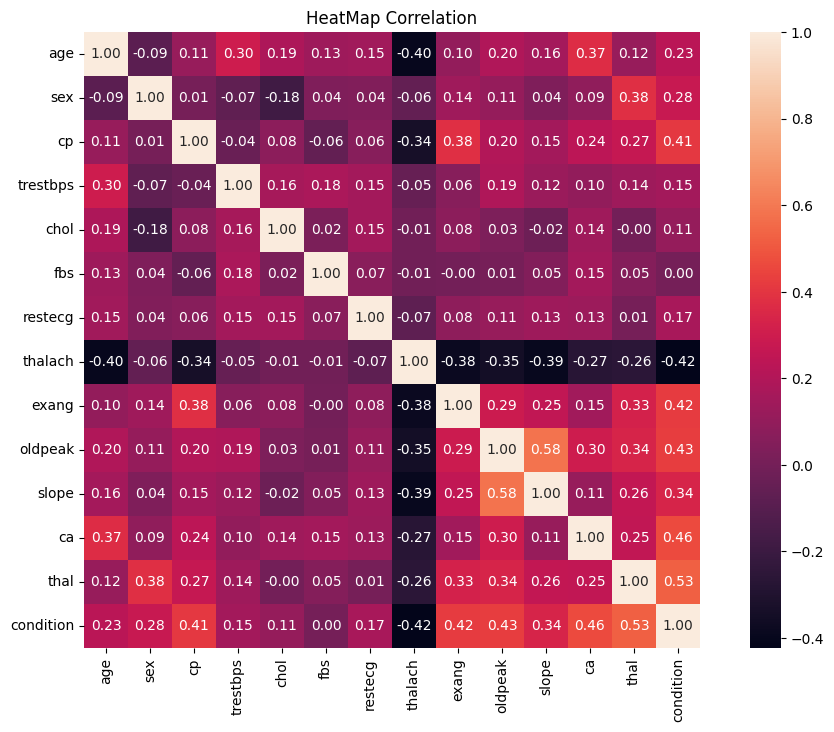

In [18]:
plt.figure(figsize=(13, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)
plt.title("HeatMap Correlation")
plt.show()

As we can see, the strongest relationship we can identify is between 'OldPeak' and 'Slope', which is 0.58.

#### Categorical Features

In [19]:
for column in categorical_columns:
    print(f"Categorical distribution for {column}: \n{df[column].value_counts()}\n")

Categorical distribution for sex: 
sex
1    201
0     95
Name: count, dtype: int64

Categorical distribution for cp: 
cp
3    142
2     82
1     49
0     23
Name: count, dtype: int64

Categorical distribution for fbs: 
fbs
0    253
1     43
Name: count, dtype: int64

Categorical distribution for restecg: 
restecg
0    147
2    145
1      4
Name: count, dtype: int64

Categorical distribution for exang: 
exang
0    199
1     97
Name: count, dtype: int64

Categorical distribution for slope: 
slope
0    139
1    136
2     21
Name: count, dtype: int64

Categorical distribution for ca: 
ca
0    173
1     65
2     38
3     20
Name: count, dtype: int64

Categorical distribution for thal: 
thal
0    164
2    114
1     18
Name: count, dtype: int64



C:\Users\agusm\AppData\Local\Temp\ipykernel_22184\176917649.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=df, palette=sns.color_palette('flare'), hue=column)
C:\Users\agusm\AppData\Local\Temp\ipykernel_22184\176917649.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x=column, data=df, palette=sns.color_palette('flare'), hue=column)
C:\Users\agusm\AppData\Local\Temp\ipykernel_22184\176917649.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=df, palette=sns.color_palette('flare'), hue=column)
C:\Users\agusm\AppData\Local\Temp\ipykernel_22184\176917649.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x=column, data=df, palette=sns.color_palette('flare'), hue=column)
C:\Users\agusm\AppData\Local

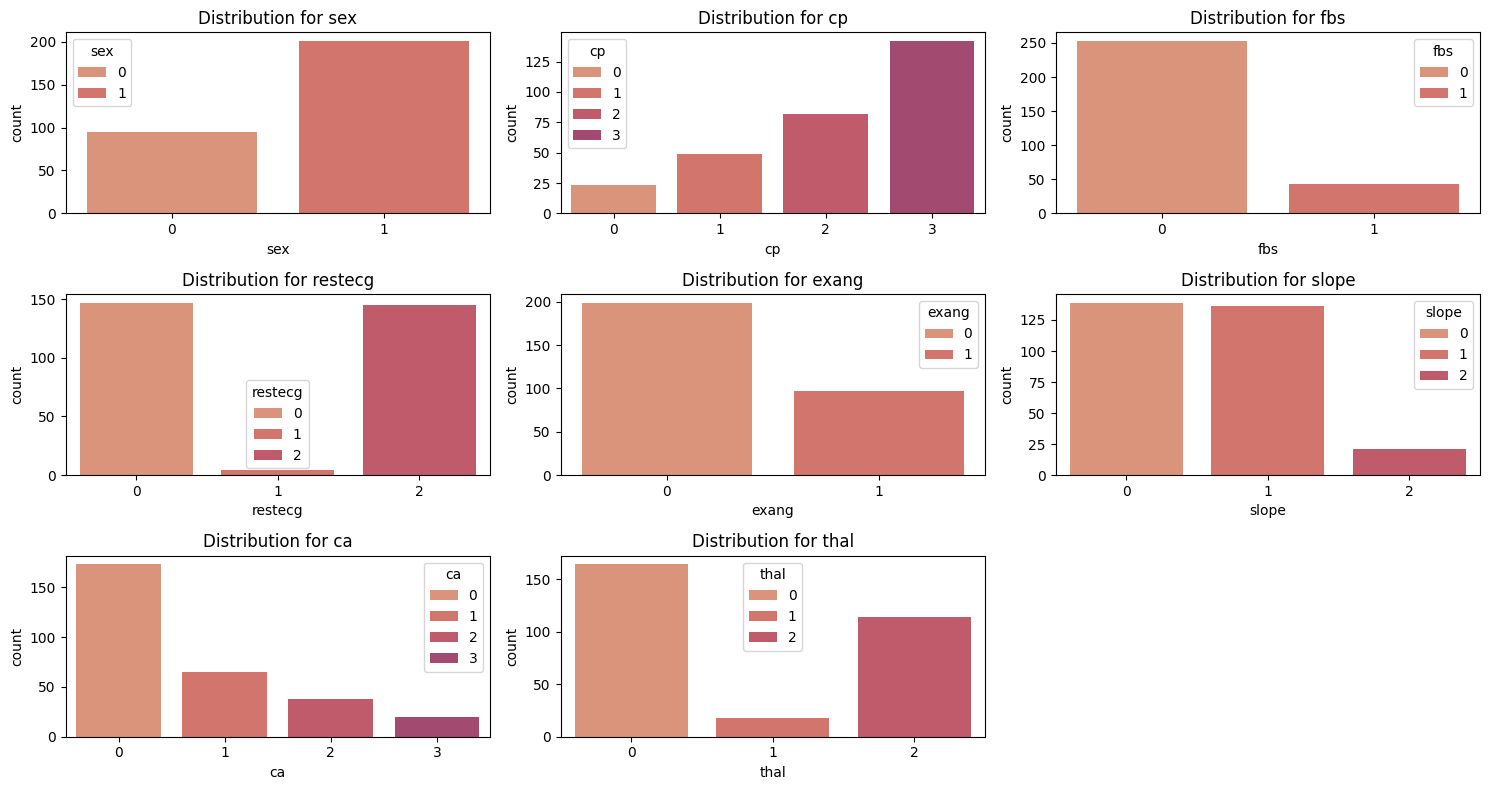

In [20]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=column, data=df, palette=sns.color_palette('flare'), hue=column)
    plt.title(f"Distribution for {column}")
plt.tight_layout()
plt.show()

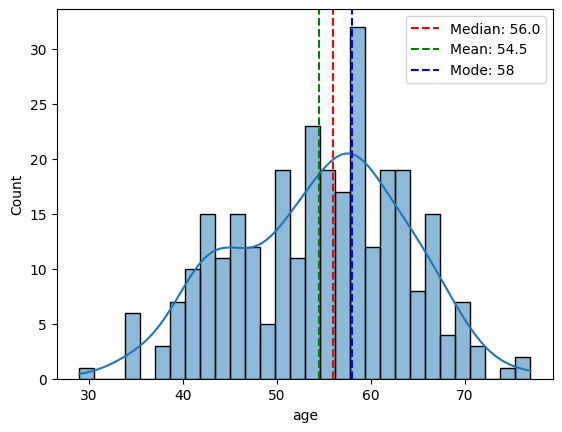

In [21]:
sns.histplot(df["age"], bins=30, kde=True)

plt.axvline(df["age"].median(), color='red', linestyle='--', label=f'Median: {df["age"].median()}')
plt.axvline(df["age"].mean(), color='green', linestyle='--', label=f'Mean: {df["age"].mean()}')
plt.axvline(df["age"].mode()[0], color='blue', linestyle='--', label=f'Mode: {df["age"].mode()[0]}')

plt.legend()
plt.show()

# Data Transformation

In [22]:

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

c:\Personal Projects\IA\Heart Disease\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [24]:
# Checking if we difference in number of samples for each condition. It does not need oversampling.

print(len(train[train["condition"] == 0]))
print(len(train[train["condition"] == 1]))

101
76


In [25]:
# Return the dataFrame, the features and the target ready fit the model.
def scale_data(dataframe, over_sample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if over_sample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y,(-1, 1))))

    return data, X, y

In [26]:
train, X_train, y_train = scale_data(train, True)
valid, X_valid, y_valid = scale_data(valid)
test, X_test, y_test = scale_data(test)

# K-Nearest Neighbors

In [27]:
def getNeighborModel( x_data, y_data, p_neighbors = 3, p_weights = 'uniform'):
    nn_model = KNeighborsClassifier(n_neighbors=p_neighbors, weights=p_weights)

    nn_model.fit(x_data, y_data)

    return nn_model

In [28]:
def printReport(listPredicts, y_pred):
    if len(listPredicts) == 0:
        ValueError("Lists must contains elements")
        return
    
    for predict in listPredicts:
        print(classification_report(y_pred, predict))
        print("\n")

In [30]:
nn_model_3 = getNeighborModel(X_train, y_train)
nn_model_5 = getNeighborModel(X_train, y_train, p_neighbors=5)
nn_model_3_distance = getNeighborModel(X_train, y_train, p_weights='distance')
nn_model_5_distance = getNeighborModel(X_train, y_train, p_neighbors=5, p_weights='distance')

In [31]:
y_pred_3 = nn_model_3.predict(X_valid)
y_pred_5 = nn_model_5.predict(X_valid)
y_pred_3_dist = nn_model_3_distance.predict(X_valid)
y_pred_5_dist = nn_model_5_distance.predict(X_valid)

In [32]:
printReport([y_pred_3, y_pred_5, y_pred_3_dist, y_pred_5_dist], y_valid)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.82      0.92      0.87        25

    accuracy                           0.88        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.89      0.88      0.88        59



              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.88      0.92      0.90        25

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.82      0.92      0.87        25

    accuracy                           0.88        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.89      0.88      0.88        59



             

# Naive Bayes

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = nb_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.85      0.92      0.88        25

    accuracy                           0.90        59
   macro avg       0.89      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



# Logistic Regresion

In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.86        25

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

